# Model validation for Novi et al (2023) 
## Evolution of oxygen and stratification in the North Pacific Ocean in CMIP6 Earth System Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
dirs='/global/homes/t/takaito/project/dataset/cmip6/'
fn=['GFDL-ESM4/o2_Omon_GFDL-ESM4_historical_woagrid.nc',\
    'CanESM5/o2_Omon_CanESM5_r1i1p1f1_185001-201412_woagrid.nc',\
    'NorESM2-LM/o2_NorESM2-LM_Omon_historical_r1i1p1f1_woagrid.nc',\
    'IPSL-CM6A-LR/o2_Omon_IPSL-CM6A-LR_r1i1p1f1_185001-201412_woagrid.nc',\
    'E3SM-2G/o2_Omon_E3SM-MPAS-O-2_JRA1p4_EC30to60E2r2_bgc1-hindcast_gwoa2013cpL33_195801-201812.nc']
mod=['(b) GFDL-ESM4','(c) CanESM5','(d) NorESM2-LM','(e) IPSL-CM6A-LR','(f) E3SM-2G']

In [3]:
#
# annual clim O2 at 200m
#
o2clim = np.zeros((5,180,360))
znam=['lev','lev','lev','olevel','lev']
#
for n in range(5):
    ds=xr.open_dataset(dirs+fn[n])
    if n==3:
        tmp=ds.o2.sel(olevel=slice(10,200)).sel(time=slice('1950-01','2014-12')).mean('time').integrate(coord='olevel').to_numpy()/190
        tmp[:,72]=.75*tmp[:,71]+.25*tmp[:,74]
        tmp[:,73]=.25*tmp[:,71]+.75*tmp[:,74]
    else:
        tmp=ds.o2.sel(lev=slice(10,200)).sel(time=slice('1950-01','2014-12')).mean('time').integrate(coord='lev').to_numpy()/190
    o2clim[n,:,:]=tmp

/tmp/ipykernel_1567710/3185486048.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax1[0].pcolormesh(x,y,o2c,vmin=0,vmax=350)
/tmp/ipykernel_1567710/3185486048.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax1[n+1].pcolormesh(x,y,bias,vmin=-100,vmax=100,cmap='RdBu_r')
/tmp/ipykernel_1567710/3185486048.py:34: UserWarning: The following kwargs were not used by contour: 'color'
  clab=ax1[n+1].contour(x,y,bias,cnt,linewidths=.5,color='k')


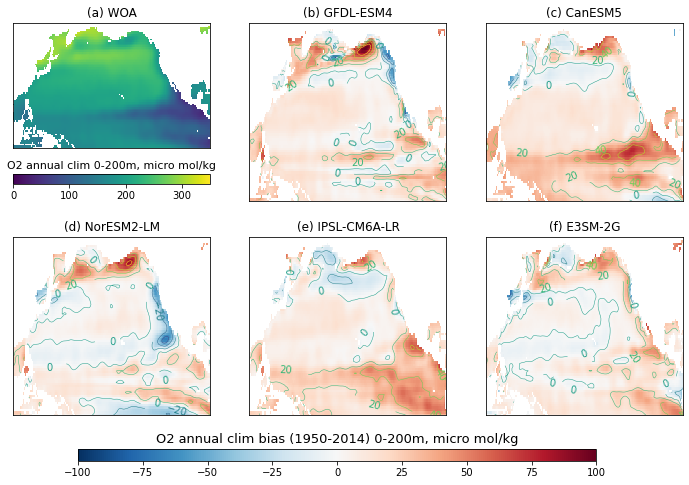

In [10]:
fig=plt.figure(figsize=(12,8))
ax=fig.subplots(2,3)
plt.subplots_adjust(hspace=0.2,wspace=0.2)
ax1=ax.flat
umol=1/1024.5*1e6
#
# WOA18
dsc=xr.open_dataset('~/project/dataset/ocean/woa09/dissolved_oxygen_annual_1deg.nc',
                   decode_times=False)
o2=dsc.sel(depth=slice(10,200)).integrate(coord='depth').o_an.to_numpy()*43.570/190
x=dsc.lon.to_numpy()
y=dsc.lat.to_numpy()    
o2c=np.squeeze(o2)
im=ax1[0].pcolormesh(x,y,o2c,vmin=0,vmax=350)
ax1[0].set_title('(a) WOA',fontsize=12)
ax1[0].set_xlim(110, 280)
ax1[0].set_ylim(-10, 65)
ax1[0].set_xticks([])
ax1[0].set_yticks([])
cb1=plt.colorbar(im,ax=ax1[0],orientation='horizontal')
cb1.set_label('O2 annual clim 0-200m, micro mol/kg',fontsize=11,labelpad=-40, y=1.05, rotation=0)
#
mask=np.zeros((180,360))
mask[80:155,110:280]=1.
RMSE=np.zeros(5)
BIAS=np.zeros(5)
#
for n in range(5):
    x=ds.lon.to_numpy()
    y=ds.lat.to_numpy()    
    bias=o2clim[n,:,:]*umol-o2c
    im=ax1[n+1].pcolormesh(x,y,bias,vmin=-100,vmax=100,cmap='RdBu_r')
    cnt=np.arange(-100,100,20)
    clab=ax1[n+1].contour(x,y,bias,cnt,linewidths=.5,color='k')
    ax1[n+1].clabel(clab, clab.levels, inline=True, fontsize=10)
    ax1[n+1].set_title(mod[n],fontsize=12)
    ax1[n+1].set_xticks([])
    ax1[n+1].set_yticks([])
    ax1[n+1].set_xlim(110, 280)
    ax1[n+1].set_ylim(-10, 65)
    RMSE[n]=np.sqrt(np.nanmean( (bias*mask).flatten()**2 ))
    BIAS[n]=np.nanmean( (bias*mask).flatten() )
    #
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.2, 0.12, 0.6, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title('O2 annual clim bias (1950-2014) 0-200m, micro mol/kg',fontsize=13)
plt.savefig('o2clim_validation_0-200m.pdf',bbox_inches='tight')

In [11]:
BIAS

array([2.61828497, 3.9001894 , 1.12348554, 3.39872077, 1.88295722])

In [12]:
RMSE

array([ 9.09048342, 11.40545852,  8.21725023, 10.63176898,  7.32050373])